# EPS 109 "Computer Simulations in Earth and Planetary Science"
### Instructor: Burkhard Militzer
### Combined lab and homework assignment on sound and audio files: Part 5, manipulate Mussorgsky's Promenade

Download the file 'Promenade_very_short_mono.wav' and execute the following commands.

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np
import simpleaudio as sa
from scipy.io import wavfile

C:\Users\lhamr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def PrintArrayInfo(a,name=''):
    if (len(name)==0):
        print("Array info:")
    else:
        print("Array:", name)
    print("shape:", a.shape)
    print("dtype:", a.dtype)
    print("min, max:", a.min(), a.max())
    print()

In [3]:
def Rescale(data):
    data2 = np.copy(data)

    dMin = data2.min()
    dMax = data2.max()
    dataRange = dMax-dMin  # warning: if you call this 'range', for loops will stop working

    data2 = (2**15-1) * ( 2.0*(data2-dMin) / dataRange -1.0 )
    data2 = data2.astype(np.int16)

    return data2

In [4]:
def Play(rate,data):
    # Start playback
    play_obj = sa.play_buffer(data, 1, 2, rate)
    # Wait for playback to finish before exiting
    play_obj.wait_done()  

In [5]:
def Write(filename,rate,data):
    wavfile.write(filename, rate, data)

In [6]:
rate, data = wavfile.read('Promenade_very_short_mono.wav')
Play(rate,data)

(1) Plot the wave amplitudes as we have done in part 2. How long is the file in seconds? Answer: 8.953832199546484 seconds

Data rate [units of Hz = 1/seconds] =  44100
Array: data
shape: (394864,)
dtype: int16
min, max: -10087 10795



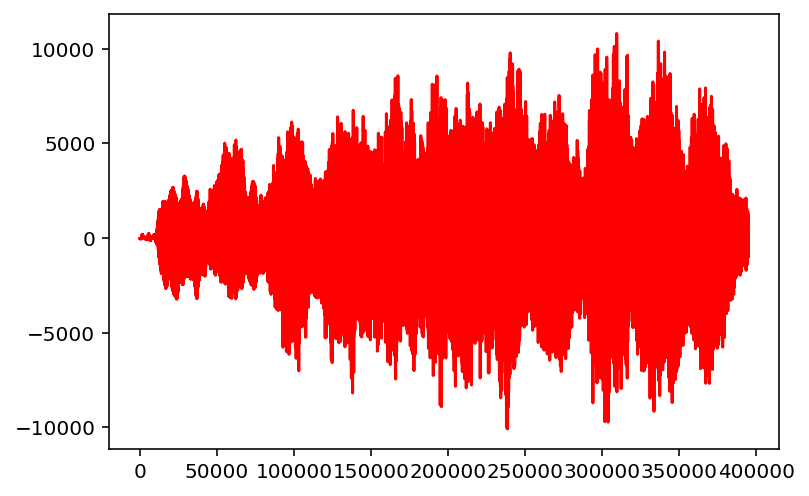

[2708224.              +0.j         1076494.30778332-1852992.98624438j
 -346954.6780714  -884011.47443171j ...   33667.55348535 +238223.79838693j
 -346954.6780714  +884011.47443171j 1076494.30778332+1852992.98624438j]
(394864,)


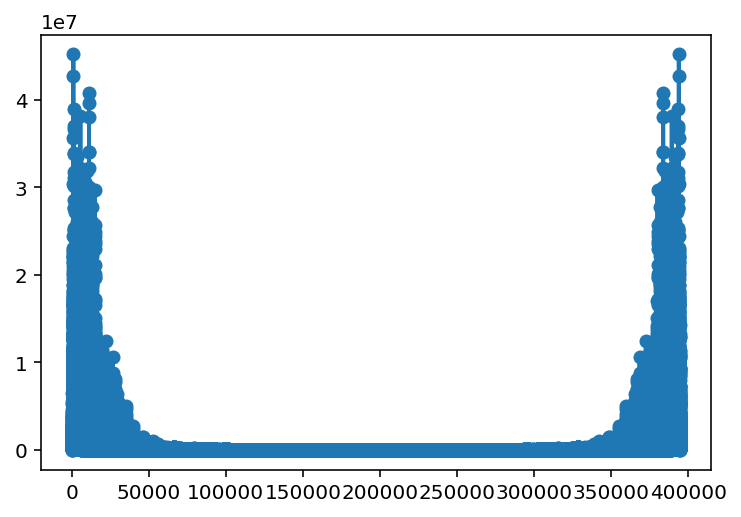

Array: data
shape: (197432,)
dtype: float64
min, max: 0.0 4086212234543068.0



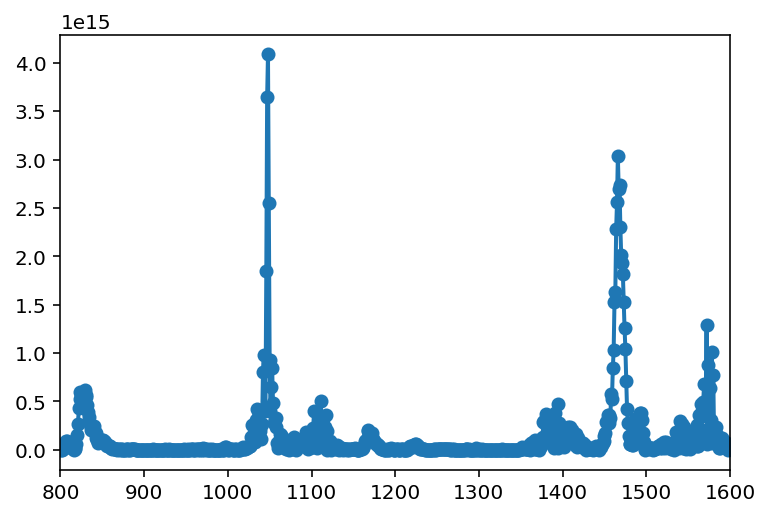

In [7]:
filename = 'Promenade_very_short_mono.wav'
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()

rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",rate)
PrintArrayInfo(data,"data")

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(data,'r-')
plt.show()

#For FFT, see https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html
ft = np.fft.fft(data)
print(ft)
print(ft.shape)
nn = ft.shape[0]

#plt.xlim(0,2000)
plt.plot(abs(ft),'o-',lw=2)
plt.show()

fAmp = np.zeros(nn//2)
for i in range(1,nn//2):
    fAmp[i] = abs(ft[i])**2 + abs(ft[nn-i])**2

plt.xlim(800,1600)
plt.plot(fAmp,'o-',lw=2)
PrintArrayInfo(fAmp,"data")
plt.show()

(2) Cut the data short so that only the first 5 notes are being played. This is about 4.1 seconds.

Wave Object: 1 channel, 16 bit, 44100 Hz
Data rate [units of Hz = 1/seconds] =  44100
Array: data
shape: (180810,)
dtype: int16
min, max: -8195 8564



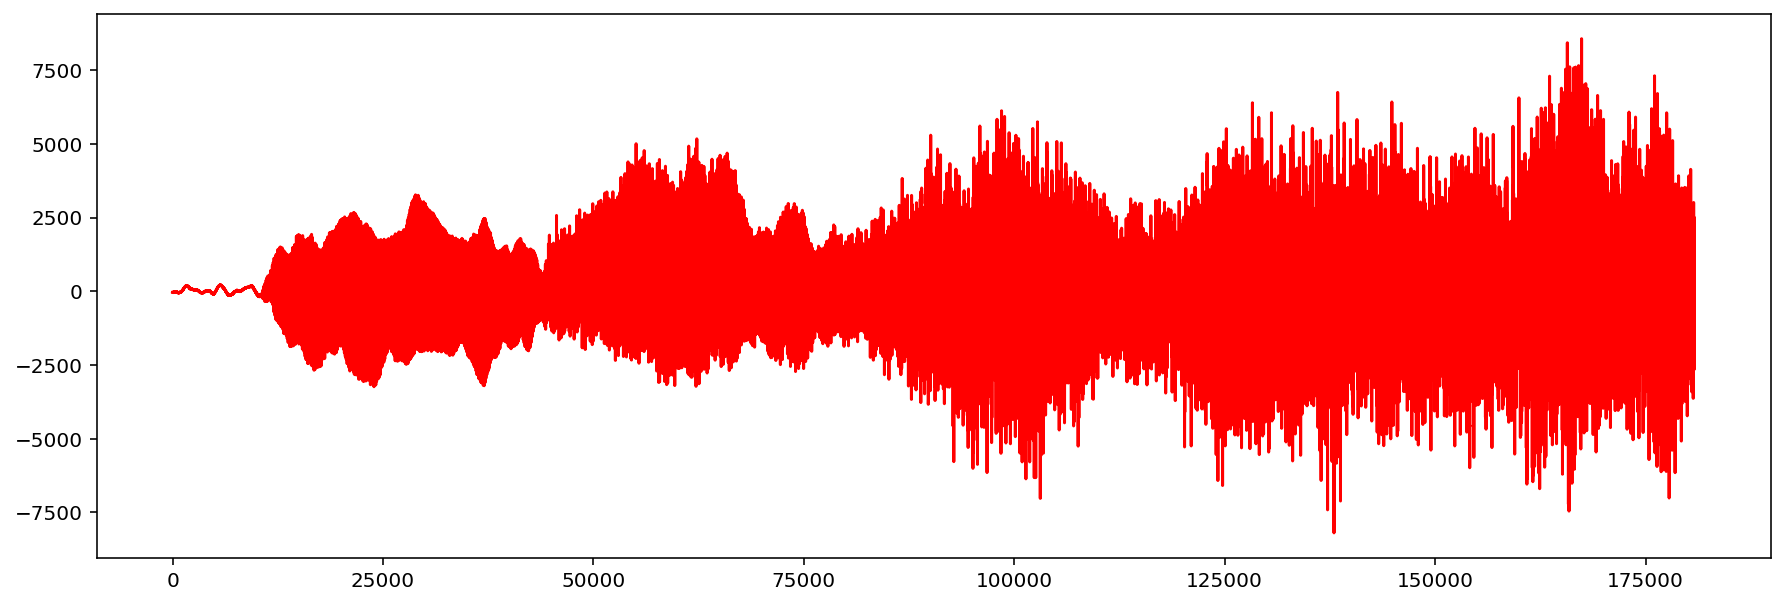

[2611468.             +0.j         -436643.38498405-655618.68199026j
  -51176.64327721-303392.26145619j ...  -86877.18059627+218070.23392844j
  -51176.64327721+303392.26145619j -436643.38498405+655618.68199026j]
(180810,)


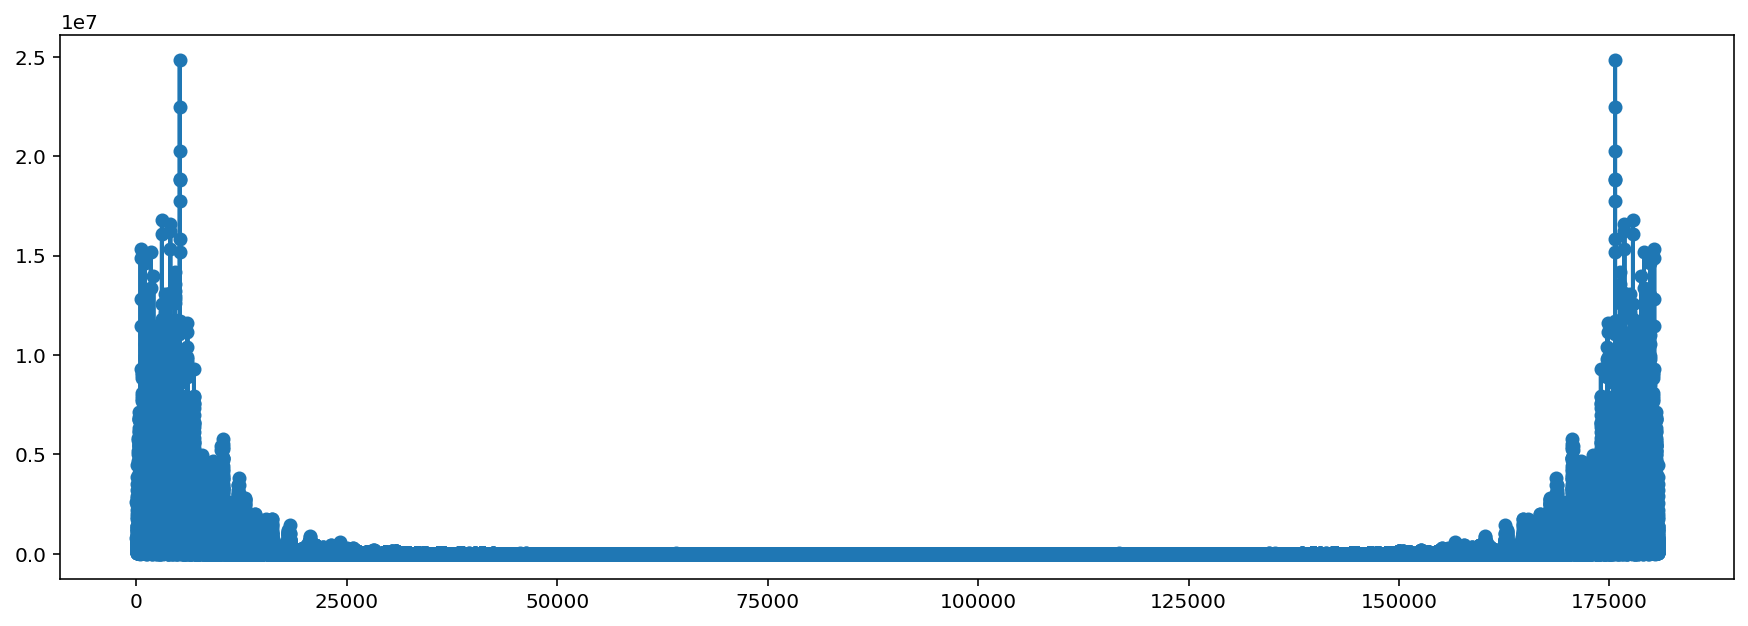

Array: data
shape: (90405,)
dtype: float64
min, max: 0.0 1234581788337081.2



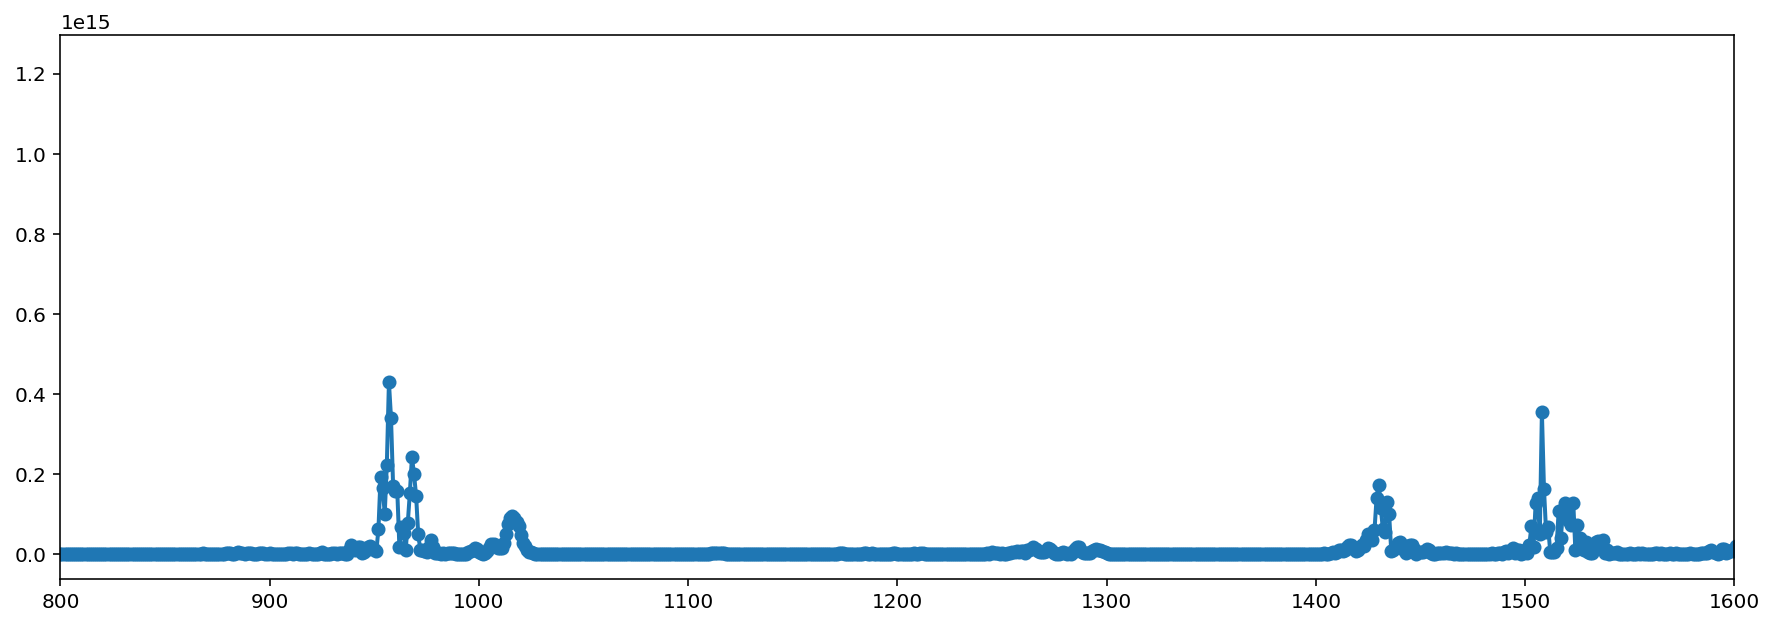

4.1
180809.99999999997


In [18]:
filename = 'Promenade_very_short_mono.wav'
wave_obj = sa.WaveObject.from_wave_file(filename)

print(wave_obj)

rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",rate)

data = data[0:180810]
PrintArrayInfo(data,"data")

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(data,'r-')
plt.show()

#For FFT, see https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html
ft = np.fft.fft(data)
print(ft)
print(ft.shape)
nn = ft.shape[0]

#plt.xlim(0,2000)
plt.plot(abs(ft),'o-',lw=2)
plt.show()

fAmp = np.zeros(nn//2)
for i in range(1,nn//2):
    fAmp[i] = abs(ft[i])**2 + abs(ft[nn-i])**2

plt.xlim(800,1600)
plt.plot(fAmp,'o-',lw=2)
PrintArrayInfo(fAmp,"data")
plt.show()

print(len(data)/rate)
print(4.1*rate)

cutVer = data[0:180810]

(3) Rather than abruptly cutting off after 4.1 seconds, manipulate the amplitude so that the muscis gradually faded away over the period of about 0.5 seconds. Add a plot that compares the orginal wave amplitude with your manipulated amplitudes.

22050.0


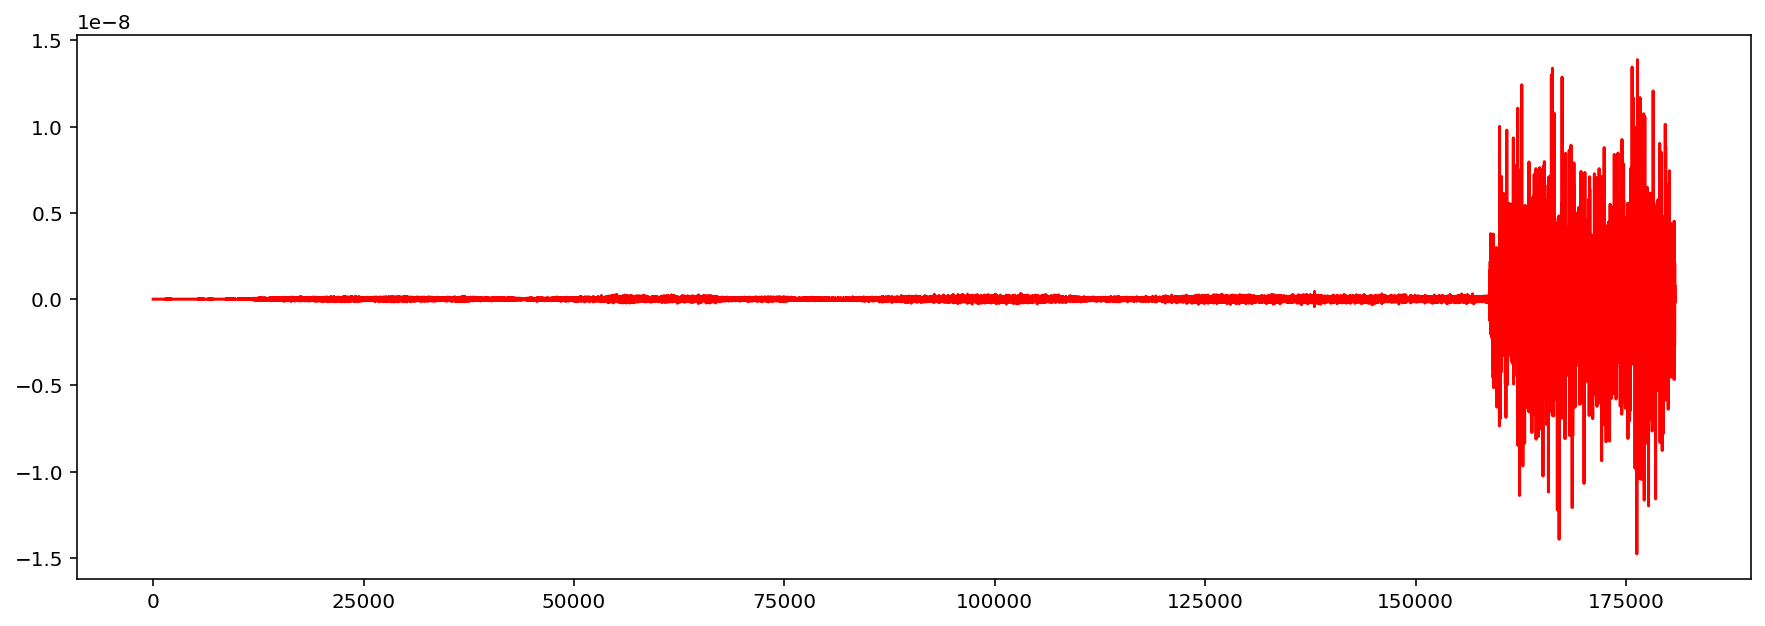

In [23]:
dTotal = data
print(rate/2)
for n in range(158760,180810):
    if (n%10==0):
        data[n] = data[n]-((n/10)/2205)*dTotal[n] #After 2205 intervals of time, the amplitude becomes 0.
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(data,'r-')
plt.show()